# Домашнее задание к лекции "Визуализация данных"
Обязательная часть

Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

    построить не менее 4 визуализаций различных видов;
    каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
    по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).


In [1]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
#pd.set_option('display.max_rows', 9999)
df = pd.read_csv('netflix_titles.csv')
df

show_id     type                                              title  \
0     81145628    Movie            Norm of the North: King Sized Adventure   
1     80117401    Movie                         Jandino: Whatever it Takes   
2     70234439  TV Show                                 Transformers Prime   
3     80058654  TV Show                   Transformers: Robots in Disguise   
4     80125979    Movie                                       #realityhigh   
5     80163890  TV Show                                            Apaches   
6     70304989    Movie                                           Automata   
7     80164077    Movie                 Fabrizio Copano: Solo pienso en mi   
8     80117902  TV Show                                       Fire Chasers   
9     70304990    Movie                                        Good People   
10    80169755    Movie                        Joaquín Reyes: Una y no más   
11    70299204    Movie                            Kidnapping Mr. Heineken   
12    80182480    Movie                           Krish Trish and Baltiboy   
13    80182483    Movie           Krish Trish and Baltiboy: Battle of Wits   
14    80182596    Movie     Krish Trish and Baltiboy: Best Friends Forever   
15    80182482    Movie          Krish Trish and Baltiboy: Comics of India   
16    80182597    Movie  Krish Trish and Baltiboy: Oversmartness Never ...   
17    80182481    Movie                  Krish Trish and Baltiboy: Part II   
18    80182621    Movie       Krish Trish and Baltiboy: The Greatest Trick   
19    80057969    Movie                                               Love   
20    80060297    Movie                                  Manhattan Romance   
21    80046728    Movie                                        Moonwalkers   
22    80046727    Movie                                     Rolling Papers   
23    70304988    Movie                                 Stonehearst Asylum   
24    80057700    Movie                                         The Runner   
25    80045922    Movie                                            6 Years   
26    80244601  TV Show                                    Castle of Stars   
27    80203094    Movie                                        City of Joy   
28    80190843  TV Show                                     First and Last   
29    70241607    Movie                                          Laddaland   
30    80988892    Movie                                           Next Gen   
31    80239639    Movie                          Sierra Burgess Is A Loser   
32    80159586    Movie           The Most Assassinated Woman in the World   
33    80152447    Movie                                     Cézanne et moi   
34    80221550  TV Show                         Archibald's Next Big Thing   
35    81154455    Movie                                         Article 15   
36    81113928    Movie                              Care of Kancharapalem   
37    81052275    Movie                              Ee Nagaraniki Emaindi   
38    81132437    Movie                                Kill Me If You Dare   
39    80178151  TV Show                                            The Spy   
40    80058026    Movie                                      Hell and Back   
41    70303496    Movie                                                 PK   
42    80162141    Movie                                          Hard Tide   
43    80095641    Movie                                       Elstree 1976   
44    81176188    Movie   American Factory: A Conversation with the Obamas   
45    80159880    Movie                                                ATM   
46    81016044    Movie                       Bangkok Traffic (Love) Story   
47    80158838    Movie                    I Fine... Thank You... Love You   
48    81016045    Movie                                            One Day   
49    70142798    Movie                                           Phobia 2   
50    70062814    Movie      

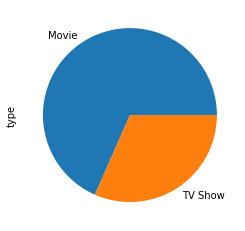

In [135]:
df.type.value_counts().plot(kind = 'pie')

Доля фильмов в 2 раза превышает долю шоу. Возможно на них больше зарабатывают.

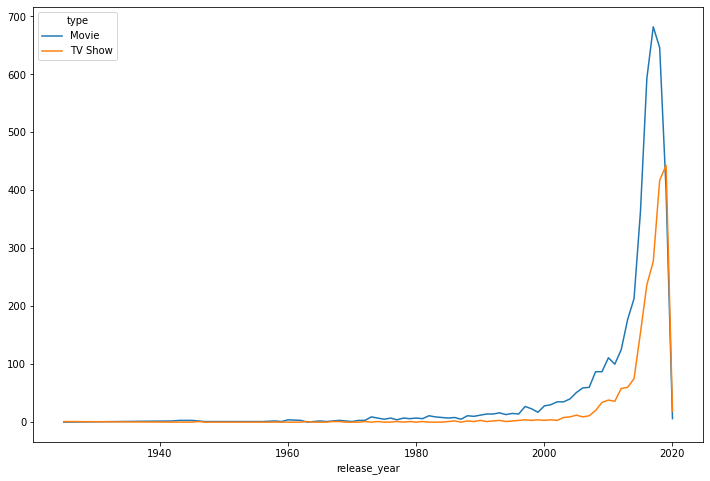

In [94]:
df.groupby(['release_year', 'type']).type.count().unstack().fillna(0).plot(figsize= (12,8))

Примерно с 2010 года видим резкое увеличение выхода новых фильмов и шоу. Население стало больше потреблять и тратить время на просмотр фильмов и передач. Возможно это связано с развитием мобильного интернета и смартфонов. Также это связано с резким ростом населения начиная с 2000х.

In [77]:
df_movie = df[df.type == 'Movie']
df_movie.head()

show_id   type                                    title  \
0  81145628  Movie  Norm of the North: King Sized Adventure   
1  80117401  Movie               Jandino: Whatever it Takes   
4  80125979  Movie                             #realityhigh   
6  70304989  Movie                                 Automata   
7  80164077  Movie       Fabrizio Copano: Solo pienso en mi   

                          director  \
0         Richard Finn, Tim Maltby   
1                              NaN   
4                 Fernando Lebrija   
6                      Gabe Ibáñez   
7  Rodrigo Toro, Francisco Schultz   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   
6  Antonio Banderas, Dylan McDermott, Melanie Gri...   
7                                    Fabrizio Copano   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
4                             United States  September 8, 2017          2017   
6    Bulgaria, United States, Spain, Canada  September 8, 2017          2014   
7                                     Chile  September 8, 2017          2017   

  rating duration                                          listed_in  \
0  TV-PG   90 min                 Children & Family Movies, Comedies   
1  TV-MA   94 min                                    Stand-Up Comedy   
4  TV-14   99 min                                           Comedies   
6      R  110 min  International Movies, Sci-Fi & Fantasy, Thrillers   
7  TV-MA   60 min                                    Stand-Up Comedy   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
4  When nerdy high schooler Dani finally attracts...  
6  In a dystopian future, an insurance adjuster f...  
7  Fabrizio Copano takes audience participation t...

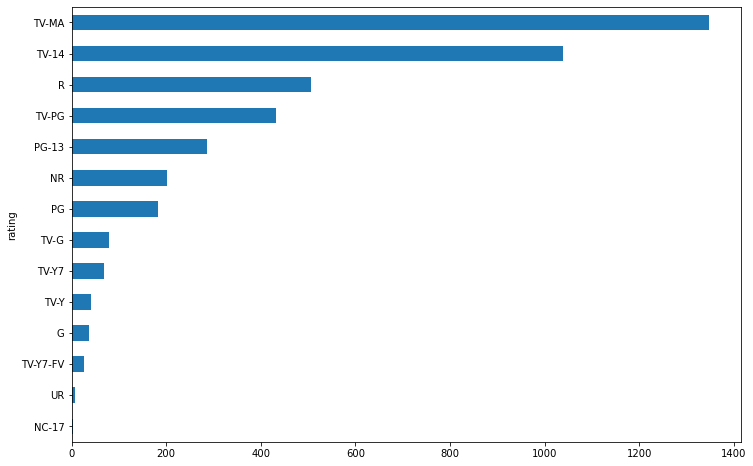

In [106]:
df_movie.groupby(['rating']).type.count().sort_values().plot(kind = 'barh',figsize= (12,8) )

Большая часть всех фильмов выходит для взрослых, так как они составляют основную часть платежеспособного населения.
Чуть меньше фильмов от 14 и выше.

In [141]:
df_movie['minutes'] = df_movie.duration.str.split().str.get(0).astype(int)

C:\Users\Wizard\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


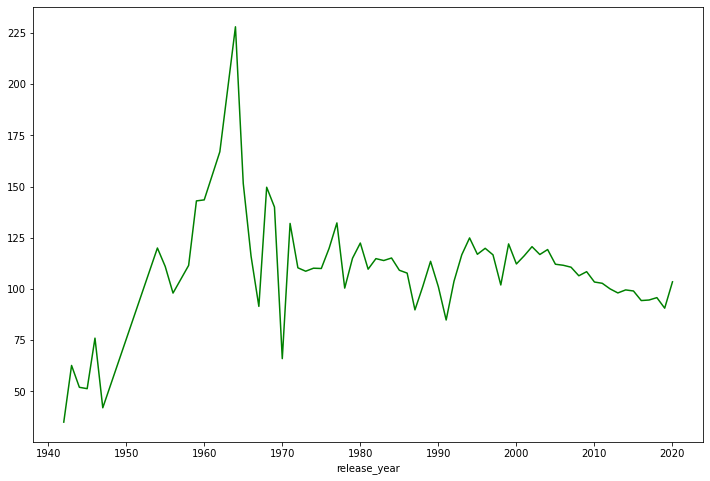

In [140]:
df_movie.groupby('release_year').minutes.mean().plot(figsize=(12,8), color = 'g')

Видим постепенное снижение среднего времени фильма. Потребители выбирают фильмы короче чем ранее, возможно из-за ускорившегося темпа жизни. Люди стали потреблять больше, но при меньшей продолжительности фильма.